In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt("data/ex1data2.txt",delimiter=",")

In [3]:
X=data[:,0:2]
X=np.hstack((np.ones((47,1)),X))


In [4]:
X.shape

(47, 3)

In [5]:
Y=data[:,2]

In [6]:
Y=Y.reshape((47,1))
Y=Y/100000
Y

array([[3.999  ],
       [3.299  ],
       [3.69   ],
       [2.32   ],
       [5.399  ],
       [2.999  ],
       [3.149  ],
       [1.98999],
       [2.12   ],
       [2.425  ],
       [2.39999],
       [3.47   ],
       [3.29999],
       [6.999  ],
       [2.599  ],
       [4.499  ],
       [2.999  ],
       [1.999  ],
       [4.99998],
       [5.99   ],
       [2.529  ],
       [2.55   ],
       [2.429  ],
       [2.599  ],
       [5.739  ],
       [2.499  ],
       [4.645  ],
       [4.69   ],
       [4.75   ],
       [2.999  ],
       [3.499  ],
       [1.699  ],
       [3.149  ],
       [5.799  ],
       [2.859  ],
       [2.499  ],
       [2.299  ],
       [3.45   ],
       [5.49   ],
       [2.87   ],
       [3.685  ],
       [3.299  ],
       [3.14   ],
       [2.99   ],
       [1.799  ],
       [2.999  ],
       [2.395  ]])

# feature Normalizatization

In [7]:
def FeatureNorm(X):
    X=X[:,1:3]
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    
    X_Norm=(X-mu)/sigma
    X_Norm=np.hstack((np.ones((47,1)),X_Norm))
    return X_Norm,mu,sigma

In [8]:
X_norm,mu,sigma=FeatureNorm(X)


# Initialize Theta

In [9]:
theta=np.zeros((3,1))

# Cost Function

In [10]:
def ComputeCost(X,Y,theta):
    m=Y.shape[0]
    return (0.5/m)*np.sum((np.dot(X,theta)-Y)**2) 

In [11]:
ComputeCost(X_norm,Y,theta)

6.559154810645745

# Gradient Descent

In [12]:
def GradientDescent(X,Y,theta,alpha,iterations):
    m=Y.shape[0]
    
    J_history=np.zeros((iterations,1))
    
    for i in range(iterations):
        theta=theta - (alpha/m)*(np.dot(X.T,(np.dot(X,theta)-Y)))
        J_history[i]=ComputeCost(X,Y,theta)
        print(J_history[i])
        
    return theta,J_history

In [13]:
Theta,J_hist=GradientDescent(X_norm,Y,theta,0.01,1500)

[6.42977763]
[6.30310183]
[6.17906942]
[6.05762369]
[5.93870917]
[5.82227165]
[5.70825809]
[5.59661664]
[5.48729661]
[5.3802484]
[5.27542352]
[5.17277455]
[5.07225512]
[4.97381986]
[4.87742442]
[4.78302542]
[4.69058042]
[4.60004793]
[4.51138734]
[4.42455895]
[4.33952394]
[4.25624431]
[4.1746829]
[4.09480338]
[4.01657018]
[3.93994853]
[3.86490441]
[3.79140452]
[3.71941632]
[3.64890795]
[3.57984824]
[3.51220671]
[3.44595353]
[3.38105953]
[3.31749615]
[3.25523545]
[3.19425011]
[3.13451339]
[3.07599912]
[3.01868171]
[2.96253609]
[2.90753776]
[2.85366274]
[2.80088755]
[2.74918923]
[2.6985453]
[2.64893378]
[2.60033314]
[2.55272232]
[2.5060807]
[2.46038813]
[2.41562485]
[2.37177155]
[2.32880932]
[2.28671966]
[2.24548446]
[2.20508599]
[2.1655069]
[2.12673022]
[2.08873932]
[2.05151794]
[2.01505016]
[1.97932039]
[1.94431337]
[1.91001418]
[1.8764082]
[1.84348112]
[1.81121894]
[1.77960795]
[1.74863472]
[1.71828613]
[1.68854931]
[1.65941167]
[1.63086088]
[1.60288489]
[1.57547187]
[1.54861027]
[1.52

[0.20432889]
[0.20432888]
[0.20432887]
[0.20432886]
[0.20432886]
[0.20432885]
[0.20432884]
[0.20432883]
[0.20432883]
[0.20432882]
[0.20432881]
[0.20432881]
[0.2043288]
[0.20432879]
[0.20432879]
[0.20432878]
[0.20432877]
[0.20432876]
[0.20432876]
[0.20432875]
[0.20432874]
[0.20432874]
[0.20432873]
[0.20432873]
[0.20432872]
[0.20432871]
[0.20432871]
[0.2043287]
[0.20432869]
[0.20432869]
[0.20432868]
[0.20432868]
[0.20432867]
[0.20432866]
[0.20432866]
[0.20432865]
[0.20432865]
[0.20432864]
[0.20432864]
[0.20432863]
[0.20432863]
[0.20432862]
[0.20432861]
[0.20432861]
[0.2043286]
[0.2043286]
[0.20432859]
[0.20432859]
[0.20432858]
[0.20432858]
[0.20432857]
[0.20432857]
[0.20432856]
[0.20432856]
[0.20432855]
[0.20432855]
[0.20432854]
[0.20432854]
[0.20432853]
[0.20432853]
[0.20432852]
[0.20432852]
[0.20432852]
[0.20432851]
[0.20432851]
[0.2043285]
[0.2043285]
[0.20432849]
[0.20432849]
[0.20432849]
[0.20432848]
[0.20432848]
[0.20432847]
[0.20432847]
[0.20432846]
[0.20432846]
[0.20432846]
[0.20

In [14]:
Theta

array([[ 3.40412563],
       [ 1.09370057],
       [-0.06500615]])

# Visualize Cost Function vs iterations

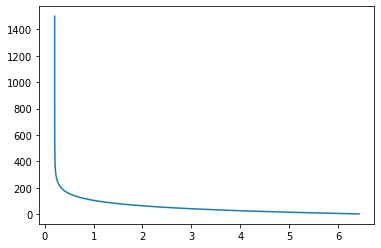

In [15]:
plt.plot(J_hist,np.linspace(1,1500,1500));

Cost Seems to be decreasing wrt no. of iterations

# Hypothesis Function

In [16]:
def hypothesis(x,Theta):
    return np.dot(x,Theta)

# Prediction on 5 values

In [17]:
X1=X_norm[0:5,:]
Y1=Y[0:5]

In [18]:
X1

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [19]:
Y1

array([[3.999],
       [3.299],
       [3.69 ],
       [2.32 ],
       [5.399]])

In [20]:
predictions=hypothesis(X1,Theta)

In [21]:
predictions

array([[3.56255221],
       [2.86142877],
       [3.97432312],
       [2.69181064],
       [4.72264631]])

# predictions are closer to Y1

# Using Normal Equation To Calculate Optimal Value of Theta 

In [22]:
def NormalEqn(X,Y):
    theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    return theta

In [23]:
theta_norm=NormalEqn(X,Y)

In [24]:
theta_norm

array([[ 0.8959791 ],
       [ 0.00139211],
       [-0.08738019]])

# predictions are closer to Y1

In [25]:
X2=X[0:5,:]
Y2=Y[0:5]

In [26]:
X2

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00]])

In [27]:
Y2

array([[3.999],
       [3.299],
       [3.69 ],
       [2.32 ],
       [5.399]])

In [28]:
preds=hypothesis(X2,theta_norm)

In [29]:
preds

array([[3.5628311 ],
       [2.86120931],
       [3.9748947 ],
       [2.69244186],
       [4.72277855]])

# predictions are closer to Y1

# Thank You